<a href="https://colab.research.google.com/github/Karansingh005/Battle_of_Neighbourhoods/blob/master/Capstilone_project_ntb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing all the necesary libraries 

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Folium installed
Libraries imported.


##Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = '50C0PKFVLEE3JHSXCJR1AACOWVPS1DAMMHPZHLDR10TR0CKX' # your Foursquare ID
CLIENT_SECRET = 'P1XJZQJEFLLKI3HXJYHXXUID1DCAFUKRWFFN3BRVTEHXWW4W' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 50C0PKFVLEE3JHSXCJR1AACOWVPS1DAMMHPZHLDR10TR0CKX
CLIENT_SECRET:P1XJZQJEFLLKI3HXJYHXXUID1DCAFUKRWFFN3BRVTEHXWW4W


## Extratcing Data

###Specifying the search category

In [3]:
search_query = 'Indian'
radius = 500
print(search_query + ' .... OK!')

Indian .... OK!


### Specifying the loaction of New York

In [4]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


### Specifying URL

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=50C0PKFVLEE3JHSXCJR1AACOWVPS1DAMMHPZHLDR10TR0CKX&client_secret=P1XJZQJEFLLKI3HXJYHXXUID1DCAFUKRWFFN3BRVTEHXWW4W&ll=40.7127281,-74.0060152&v=20180604&query=Indian&radius=500&limit=30'

###Fetching the results

In [6]:
results_nyc = requests.get(url).json()
results_nyc

{'meta': {'code': 200, 'requestId': '5dc7deb592e7a9002c7cc109'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'primary': True,
      'shortName': 'Indian'}],
    'delivery': {'id': '275521',
     'provider': {'icon': {'name': '/delivery_provider_seamless_20180129.png',
       'prefix': 'https://fastly.4sqi.net/img/general/cap/',
       'sizes': [40, 50]},
      'name': 'seamless'},
     'url': 'https://www.seamless.com/menu/a-saffron-thread-98-chambers-st-new-york/275521?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=275521'},
    'hasPerk': False,
    'id': '510aad1ae4b0bfb2583169b9',
    'location': {'address': '98 Chambers St',
     'cc': 'US',
     'city': 'New York',
     'country': 'United States',
     'c

### Generating the Dataframe for New York

In [7]:
venues = results_nyc['response']['venues']

df_nyc = json_normalize(venues)
df_nyc.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,510aad1ae4b0bfb2583169b9,A Saffron Thread Fresh Indian,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1573379765,False,98 Chambers St,at Church St,40.714823,-74.007689,"[{'label': 'display', 'lat': 40.71482256030567...",272,10007,US,New York,NY,United States,"[98 Chambers St (at Church St), New York, NY 1...",275521,https://www.seamless.com/menu/a-saffron-thread...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,432263795,NaN
1,5072fe2eb0ed0fcce2497f30,Indian Biryani Delights (Cart),"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1573379765,False,Water St,btwn Maiden Lane & Pine St,40.714619,-74.011659,"[{'label': 'display', 'lat': 40.71461902180173...",520,10005,US,New York,NY,United States,"[Water St (btwn Maiden Lane & Pine St), New Yo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,573f435b498e03b8bb8582c7,Indian king Biriyani House,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1573379765,False,140 Broadway,NaN,40.749834,-73.991655,"[{'label': 'display', 'lat': 40.74983405175337...",4304,10005,US,New York,NY,United States,"[140 Broadway, New York, NY 10005, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tribeca
3,5d18e90b96ba5e00232c527f,Bismilla Indian Biryani House,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1573379765,False,NaN,NaN,40.715380,-74.011246,"[{'label': 'display', 'lat': 40.71538, 'lng': ...",530,10007,US,New York,NY,United States,"[New York, NY 10007, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575dea4c498e2739e43a27e2,Aahar Indian Cuisine,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1573379765,False,10 Murray St,Broadway,40.713307,-74.007994,"[{'label': 'display', 'lat': 40.71330656515891...",178,10007,US,New York,NY,United States,"[10 Murray St (Broadway), New York, NY 10007, ...",333939,https://www.seamless.com/menu/aahar-indian-cui...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN,NaN


### Filtering the dataset

In [8]:
filtered_columns = ['name', 'categories'] + [col for col in df_nyc.columns if col.startswith('location.')] + ['id']
df_fil_nyc = df_nyc.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_fil_nyc['categories'] = df_fil_nyc.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_fil_nyc.columns = [column.split('.')[-1] for column in df_fil_nyc.columns]

df_fil_nyc

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,A Saffron Thread Fresh Indian,Indian Restaurant,98 Chambers St,at Church St,40.714823,-74.007689,"[{'label': 'display', 'lat': 40.71482256030567...",272,10007,US,New York,NY,United States,"[98 Chambers St (at Church St), New York, NY 1...",NaN,510aad1ae4b0bfb2583169b9
1,Indian Biryani Delights (Cart),Food Truck,Water St,btwn Maiden Lane & Pine St,40.714619,-74.011659,"[{'label': 'display', 'lat': 40.71461902180173...",520,10005,US,New York,NY,United States,"[Water St (btwn Maiden Lane & Pine St), New Yo...",NaN,5072fe2eb0ed0fcce2497f30
2,Indian king Biriyani House,Food Truck,140 Broadway,NaN,40.749834,-73.991655,"[{'label': 'display', 'lat': 40.74983405175337...",4304,10005,US,New York,NY,United States,"[140 Broadway, New York, NY 10005, United States]",Tribeca,573f435b498e03b8bb8582c7
3,Bismilla Indian Biryani House,Food Truck,NaN,NaN,40.715380,-74.011246,"[{'label': 'display', 'lat': 40.71538, 'lng': ...",530,10007,US,New York,NY,United States,"[New York, NY 10007, United States]",NaN,5d18e90b96ba5e00232c527f
4,Aahar Indian Cuisine,Indian Restaurant,10 Murray St,Broadway,40.713307,-74.007994,"[{'label': 'display', 'lat': 40.71330656515891...",178,10007,US,New York,NY,United States,"[10 Murray St (Broadway), New York, NY 10007, ...",NaN,575dea4c498e2739e43a27e2
5,Indian Biryani House,Food Truck,NaN,NaN,40.708589,-74.009926,"[{'label': 'display', 'lat': 40.70858930780341...",566,NaN,US,New York,NY,United States,"[New York, NY, United States]",NaN,553fb844498e6cc1b6da5ce4
6,Indian Express,Indian Restaurant,18 Murray St,Church St.,40.713647,-74.008348,"[{'label': 'display', 'lat': 40.71364680217225...",221,10007,US,New York,NY,United States,"[18 Murray St (Church St.), New York, NY 10007...",NaN,4a948b83f964a520f32120e3
7,Indian Beautiful Art (IBA) Crafts PVT Ltd,Clothing Store,100 Church St,NaN,40.712281,-74.010129,"[{'label': 'display', 'lat': 40.71228057311295...",350,10007,US,New York,NY,United States,"[100 Church St, New York, NY 10007, United Sta...",NaN,574eab2a498e3f5530cfdbca
8,Indian Beautiful Art (IBA) Crafts PVT Ltd,Design Studio,100 Church St,NaN,40.716135,-74.006610,"[{'label': 'display', 'lat': 40.71613521878094...",382,10007,US,New York,NY,United States,"[100 Church St, New York, NY 10007, United Sta...",NaN,574e8ba2cd10da9c722374fb
9,Baluchi's Indian,Indian Restaurant,176 Church Street,between Duane and Reade Streets,40.715614,-74.007545,"[{'label': 'display', 'lat': 40.715614, 'lng':...",346,NaN,US,New York,NY,United States,[176 Church Street (between Duane and Reade St...,NaN,5730b7a9498ef7b05c09c07f


### Specifying the location of Toronto

In [9]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


### Specifying the URL for Toronto

In [10]:
url_1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url_1

'https://api.foursquare.com/v2/venues/search?client_id=50C0PKFVLEE3JHSXCJR1AACOWVPS1DAMMHPZHLDR10TR0CKX&client_secret=P1XJZQJEFLLKI3HXJYHXXUID1DCAFUKRWFFN3BRVTEHXWW4W&ll=43.653963,-79.387207&v=20180604&query=Indian&radius=500&limit=30'

### Fetching results from JSON 

In [11]:
results_tor = requests.get(url_1).json()
results_tor

{'meta': {'code': 200, 'requestId': '5dc7deb7cad1b60039b0e19e'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'primary': True,
      'shortName': 'Indian'}],
    'hasPerk': False,
    'id': '4afd920ff964a520ad2822e3',
    'location': {'address': '181 Dundas St W',
     'cc': 'CA',
     'city': 'Toronto',
     'country': 'Canada',
     'crossStreet': 'W of Chestnut St',
     'distance': 136,
     'formattedAddress': ['181 Dundas St W (W of Chestnut St)',
      'Toronto ON M5G 1C7',
      'Canada'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65511996683289,
       'lng': -79.3866447102921}],
     'lat': 43.65511996683289,
     'lng': -79.3866447102921,
     'postalCode': 'M5G 1C7',
     'state': 'ON'},
    'name': 'Indian Biriyani House',
    'referralI

### Generating Dataframe for Toronto

In [12]:
venues = results_tor['response']['venues']

df_tor = json_normalize(venues)
df_tor.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4afd920ff964a520ad2822e3,Indian Biriyani House,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1573379767,False,181 Dundas St W,W of Chestnut St,43.655120,-79.386645,"[{'label': 'display', 'lat': 43.65511996683289...",136,M5G 1C7,CA,Toronto,ON,Canada,"[181 Dundas St W (W of Chestnut St), Toronto O..."
1,4b2a634af964a52020a824e3,Indian Flavour,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1573379767,False,123 Dundas St W,btw Elizabeth & Bay,43.655649,-79.384119,"[{'label': 'display', 'lat': 43.65564910619165...",311,NaN,CA,Toronto,ON,Canada,"[123 Dundas St W (btw Elizabeth & Bay), Toront..."
2,596f9dea1fa7632be2eacab9,Mami's Indian Cuisine,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1573379767,False,NaN,NaN,43.656986,-79.385840,"[{'label': 'display', 'lat': 43.65698561897954...",354,M5G 2N2,CA,Toronto,ON,Canada,"[Toronto ON M5G 2N2, Canada]"
3,4e122e6cb0fbfef99b985de1,Jodpore Club Indian Cuisine,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1573379767,False,NaN,NaN,43.655946,-79.393504,"[{'label': 'display', 'lat': 43.655946, 'lng':...",553,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]"


### Filtering the Dataset

In [13]:
filtered_columns = ['name', 'categories'] + [col for col in df_tor.columns if col.startswith('location.')] + ['id']
df_fil_tor = df_tor.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_fil_tor['categories'] = df_fil_tor.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_fil_tor.columns = [column.split('.')[-1] for column in df_fil_tor.columns]

df_fil_tor

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Indian Biriyani House,Indian Restaurant,181 Dundas St W,W of Chestnut St,43.655120,-79.386645,"[{'label': 'display', 'lat': 43.65511996683289...",136,M5G 1C7,CA,Toronto,ON,Canada,"[181 Dundas St W (W of Chestnut St), Toronto O...",4afd920ff964a520ad2822e3
1,Indian Flavour,Indian Restaurant,123 Dundas St W,btw Elizabeth & Bay,43.655649,-79.384119,"[{'label': 'display', 'lat': 43.65564910619165...",311,NaN,CA,Toronto,ON,Canada,"[123 Dundas St W (btw Elizabeth & Bay), Toront...",4b2a634af964a52020a824e3
2,Mami's Indian Cuisine,Food Truck,NaN,NaN,43.656986,-79.385840,"[{'label': 'display', 'lat': 43.65698561897954...",354,M5G 2N2,CA,Toronto,ON,Canada,"[Toronto ON M5G 2N2, Canada]",596f9dea1fa7632be2eacab9
3,Jodpore Club Indian Cuisine,Indian Restaurant,NaN,NaN,43.655946,-79.393504,"[{'label': 'display', 'lat': 43.655946, 'lng':...",553,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",4e122e6cb0fbfef99b985de1


## Visualizing the data

###Map visualizing data in New York



In [14]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

venues_map_nyc = folium.Map(location=[latitude, longitude], zoom_start=15) 


# add the Indian restaurants as blue circle markers
for lat, lng, label in zip(df_fil_nyc.lat, df_fil_nyc.lng, df_fil_nyc.categories):
    folium.Marker(
        [lat, lng],
        popup=label,
    ).add_to(venues_map_nyc)

# display map
venues_map_nyc

### Map visualizing data in Toronto

In [15]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

venues_map_tor = folium.Map(location=[latitude, longitude], zoom_start=14) 


# add the Indian restaurants as blue circle markers
for lat, lng, label in zip(df_fil_tor.lat, df_fil_tor.lng, df_fil_tor.categories):
    folium.Marker(
        [lat, lng],
        popup=label,
    ).add_to(venues_map_tor)

# display map
venues_map_tor

## Creating Tourism data for New York and Toronto

### City of New York


In [20]:
data = {'Years': [2013,2014,2015,2016,2017,2018],'TouristCount':[231000,259000,290000,322000,349000,358000]}
df_tourist_nyc = pd.DataFrame(data)
df_tourist_nyc

,Years,TouristCount
0,2013,231000
1,2014,259000
2,2015,290000
3,2016,322000
4,2017,349000
5,2018,358000


Text(0.5, 1.0, 'Number of Indian Tourists over the years')

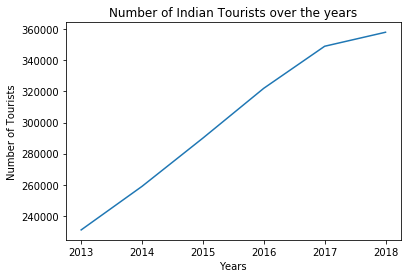

In [23]:
import matplotlib.pyplot as plt


plt.plot(df_tourist_nyc.Years,df_tourist_nyc.TouristCount)
plt.xlabel('Years')
plt.ylabel('Number of Tourists')
plt.title('Number of Indian Tourists over the years')